<a href="https://colab.research.google.com/github/hjj31/NLP/blob/main/NLP_Assignment1_J020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk as nltk
import numpy as np
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df=pd.read_csv(r"/content/spam.csv",encoding="ISO-8859-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
cols=[2,3,4]
df=df.drop(df.columns[cols],axis=1)

In [6]:
df=df.rename({'v1':'y','v2':'x'},axis=1)

In [7]:
df

,y,x
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


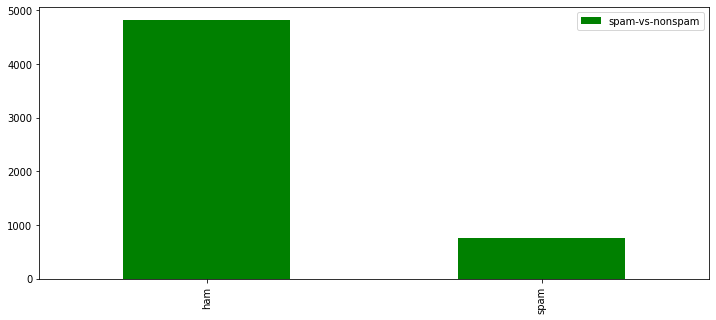

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
df['y'].value_counts().plot(kind='bar',color='green',label='spam-vs-nonspam')
plt.legend()
plt.show()

In [9]:
from string import punctuation
from nltk.corpus import stopwords
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
corpus = df['x'].tolist()
len(corpus)

5572

In [10]:
final_corpus = []
for i in range(len(corpus)):
  word = word_tokenize(corpus[i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)
#final_corpus

In [11]:
x=df['x']
y=df['y']

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(df['x'])
x = vector.toarray()
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
df

,y,x
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
rus = RandomUnderSampler()
x, y = rus.fit_resample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [16]:
from sklearn.naive_bayes import MultinomialNB
ab = MultinomialNB()
ab.fit(x_train,y_train)
ypred = ab.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

0.9849372384937238
[[588   8]
 [ 10 589]]
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       596
        spam       0.99      0.98      0.98       599

    accuracy                           0.98      1195
   macro avg       0.98      0.98      0.98      1195
weighted avg       0.98      0.98      0.98      1195



In [17]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

0.9631799163179916
[[594   2]
 [ 42 557]]
              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       596
        spam       1.00      0.93      0.96       599

    accuracy                           0.96      1195
   macro avg       0.97      0.96      0.96      1195
weighted avg       0.97      0.96      0.96      1195



In [18]:
from sklearn.svm import LinearSVC
svc = LinearSVC().fit(x_train,y_train)
y_pred = svc.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

1.0
[[596   0]
 [  0 599]]
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       596
        spam       1.00      1.00      1.00       599

    accuracy                           1.00      1195
   macro avg       1.00      1.00      1.00      1195
weighted avg       1.00      1.00      1.00      1195

